In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
strSource = r"C:\Projekte\covid-19\FME\Covid19_RKI_Sums_HH_MV.csv"
df = pd.read_csv(strSource, sep=';', header=0, encoding='utf-8')

In [15]:
laender = {2: 'Hamburg', 13: 'Mecklenburg-Vorpommern'}
dfn = pd.DataFrame()

#Anzahl Fall - Anzahl Todesfall wird als Genesung nach Ablauf von 14 Tagen angenommen!
for dictKeyType, dictValueType in laender.items():
    a = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0], dtype=np.int64)
    df_land = df.loc[df['IdBundesland'] == dictKeyType,:]

    for i, s in df_land.iterrows():
        if a.size < df_land.count(axis=0)[0]:     
            a = np.append(a, [s.values[0] - s.values[1]])

    df_land.loc[:,'Genesung'] = a
    df_land.loc[:,'SummeGenesung'] = df_land.loc[:,'Genesung'].cumsum(axis=0)
    df_land.loc[:,'RestInfiziert'] = df_land.loc[:,'AnzahlFall'] - df_land.loc[:,'AnzahlTodesfall'] - df_land.loc[:,'Genesung']
    df_land.loc[:,'SummeRestInfiziert'] = df_land.loc[:,'RestInfiziert'].cumsum(axis=0)
    dfn = dfn.append(df_land)

<Figure size 432x288 with 0 Axes>

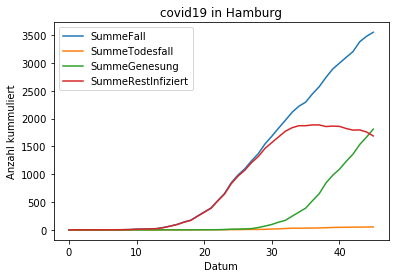

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure()
df_hh = dfn.loc[dfn['IdBundesland'] == 2,:]
df_hh.loc[:,'SummeFall'].plot.line()
df_hh.loc[:,'SummeTodesfall'].plot.line()
df_hh.loc[:,'SummeGenesung'].plot.line()
df_hh.loc[:,'SummeRestInfiziert'].plot.line()
plt.title('covid19 in Hamburg')
plt.xlabel('Datum')
plt.ylabel('Anzahl kummuliert')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

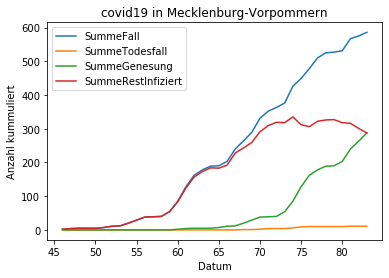

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure()
df_mv = dfn.loc[dfn['IdBundesland'] == 13,:]
df_mv.loc[:,'SummeFall'].plot.line()
df_mv.loc[:,'SummeTodesfall'].plot.line()
df_mv.loc[:,'SummeGenesung'].plot.line()
df_mv.loc[:,'SummeRestInfiziert'].plot.line()
plt.title('covid19 in Mecklenburg-Vorpommern')
plt.xlabel('Datum')
plt.ylabel('Anzahl kummuliert')
plt.legend()
plt.figure()

In [18]:
dfn.to_csv(r"C:\Projekte\covid-19\FME\Covid19_RKI_Sums_HH_MV_pandas.csv", sep=';', na_rep='NaN', index=False)